In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!pip install geopandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/CMPT_733_Project/'

Mounted at /content/drive


In [ ]:
# path = '../data/'

In [4]:
data = pd.read_parquet(path+'final_dataset.parquet')

In [5]:
data.head()

county       date  daily_cases  daily_cases_by_population  daily_deaths  \
0  Albany 2021-01-01        11917                   0.037850           205   
1  Albany 2021-01-01        11917                   0.037850           205   
2  Albany 2022-01-01        41133                   0.130644           439   
3  Albany 2022-01-01        41133                   0.130644           439   
4  Albany 2021-01-10        14196                   0.045088           231   

   daily_deaths_by_population  POP2020  Partially Vaccinated  \
0                    0.000651   314848                5757.0   
1                    0.000651   314848                5757.0   
2                    0.001394   314848              241673.0   
3                    0.001394   314848              241673.0   
4                    0.000734   314848               12016.0   

   Fully Vaccinated  Non Vaccinated  ...  Number of ICU Beds By County  \
0              17.0        309091.0  ...                         153.0   
1              17.0        309091.0  ...                         153.0   
2          219390.0         73175.0  ...                         102.0   
3          219390.0         73175.0  ...                         102.0   
4             855.0        302832.0  ...                         163.0   

   Number of ICU Beds Available By County  \
0                                    22.0   
1                                    22.0   
2                                     5.0   
3                                     5.0   
4                                    30.0   

   Total Beds By County per thousand ppl  \
0                               3.849477   
1                               3.849477   
2                               3.074499   
3                               3.074499   
4                               3.957465   

  Number of ICU Beds By County per thousand ppl  \
0                                      0.485949   
1                                      0.485949   
2                                      0.323966   
3                                      0.323966   
4                                      0.517710   

   retail_and_recreation_percent_change_from_baseline  \
0                                              -56.0    
1                                              -56.0    
2                                              -49.0    
3                                              -49.0    
4                                              -35.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                              -38.0   
1                                              -38.0   
2                                              -36.0   
3                                              -36.0   
4                                              -13.0   

   parks_percent_change_from_baseline  \
0                               -15.0   
1                               -15.0   
2                                52.0   
3                                52.0   
4                                34.0   

   transit_stations_percent_change_from_baseline  \
0                                          -71.0   
1                                          -71.0   
2                                          -54.0   
3                                          -54.0   
4                                          -55.0   

   workplaces_percent_change_from_baseline  \
0                                    -77.0   
1                                    -77.0   
2                                    -45.0   
3                                    -45.0   
4                                    -19.0   

   residential_percent_change_from_baseline  
0                                      29.0  
1                                      29.0  
2                                      10.0  
3                                      10.0  
4                                       8.0  

[5 rows x 38 columns]

In [6]:
data.columns

Index(['county', 'date', 'daily_cases', 'daily_cases_by_population',
       'daily_deaths', 'daily_deaths_by_population', 'POP2020',
       'Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated',
       'Partially Vaccinated per Population',
       'Fully Vaccinated per Population', 'Non Vaccinated per Population',
       'Facility Name', 'Patients Age 55 to 64 Years',
       'Patients Age 65 to 74 Years', 'Patients Age 75 to 84 Years',
       'Patients Currently Hospitalized', 'Patients Newly Admitted',
       'Patients Positive After Admission', 'Patients Currently in ICU',
       'Patients Currently ICU Intubated', 'Total Beds',
       'Number of Beds Available', 'Number of ICU Beds',
       'Number of ICU Beds Available', 'Total Beds By County',
       'Number of Beds Available By County', 'Number of ICU Beds By County',
       'Number of ICU Beds Available By County',
       'Total Beds By County per thousand ppl',
       'Number of ICU Beds By County per thousand ppl',
    

In [7]:
df_temp = data[['county', 'date', 'daily_cases', 'daily_deaths', 'Fully Vaccinated per Population', 'Patients Currently Hospitalized', 'POP2020']]
df_temp = df_temp.groupby(['county', 'date', 'daily_cases', 'daily_deaths', 
                  'Fully Vaccinated per Population', 'POP2020'])['Patients Currently Hospitalized'].sum().reset_index()

df_temp = df_temp.sort_values(by=['county', 'date'])
df_temp['cases_diff'] = df_temp.groupby(['county'])['daily_cases'].diff()
df_temp['deaths_diff'] = df_temp.groupby(['county'])['daily_deaths'].diff()

In [8]:
df_temp.head()

county       date  daily_cases  daily_deaths  \
0  Albany 2020-03-26          171             0   
1  Albany 2020-03-27          187             0   
2  Albany 2020-03-28          195             0   
3  Albany 2020-03-29          205             1   
4  Albany 2020-03-30          217             1   

   Fully Vaccinated per Population  POP2020  Patients Currently Hospitalized  \
0                              0.0   314848                             22.0   
1                              0.0   314848                             18.0   
2                              0.0   314848                             31.0   
3                              0.0   314848                             34.0   
4                              0.0   314848                             44.0   

   cases_diff  deaths_diff  
0         NaN          NaN  
1        16.0          0.0  
2         8.0          0.0  
3        10.0          1.0  
4        12.0          0.0

In [9]:
def replace_nas(row, col, new_col):
  if pd.isna(row[new_col]):
    return row[col]
  else:
    return row[new_col]

df_temp['cases_diff'] = df_temp.apply(lambda x: replace_nas(x, 'daily_cases', 'cases_diff'), axis=1)
df_temp['deaths_diff'] = df_temp.apply(lambda x: replace_nas(x, 'daily_deaths', 'deaths_diff'), axis=1)

In [10]:
df_temp.head()

county       date  daily_cases  daily_deaths  \
0  Albany 2020-03-26          171             0   
1  Albany 2020-03-27          187             0   
2  Albany 2020-03-28          195             0   
3  Albany 2020-03-29          205             1   
4  Albany 2020-03-30          217             1   

   Fully Vaccinated per Population  POP2020  Patients Currently Hospitalized  \
0                              0.0   314848                             22.0   
1                              0.0   314848                             18.0   
2                              0.0   314848                             31.0   
3                              0.0   314848                             34.0   
4                              0.0   314848                             44.0   

   cases_diff  deaths_diff  
0       171.0          0.0  
1        16.0          0.0  
2         8.0          0.0  
3        10.0          1.0  
4        12.0          0.0

In [11]:
df_temp = df_temp.drop(['daily_cases', 'daily_deaths'], axis=1)
df_temp = df_temp.rename(columns={'cases_diff':'daily_cases', 'deaths_diff':'daily_deaths'})

In [12]:
df_temp['daily_cases_by_population'] = df_temp.apply(lambda x: x['daily_cases']/x['POP2020'], axis=1)
df_temp['daily_deaths_by_population'] = df_temp.apply(lambda x: x['daily_deaths']/x['POP2020'], axis=1)
df_temp['hospitalizations_by_population'] = df_temp.apply(lambda x: x['Patients Currently Hospitalized']/x['POP2020'], axis=1)

In [14]:
from google import colab
def handle_negatives(row, col):
  if row[col] < 0:
    return 0
  else:
    return row[col]

df_temp['daily_cases'] = df_temp.apply(lambda x: handle_negatives(x, 'daily_cases'), axis=1)
df_temp['daily_deaths'] = df_temp.apply(lambda x: handle_negatives(x, 'daily_deaths'), axis=1)

In [15]:
df = df_temp.copy()

In [ ]:
# df = data[['date', 'county', 'daily_cases_by_population', 'daily_deaths_by_population',
#             'Fully Vaccinated per Population', 'Patients Currently Hospitalized', 'POP2020']]
# df = df.groupby(['date', 'county', 'daily_cases_by_population', 'daily_deaths_by_population', 
#                   'Fully Vaccinated per Population', 'POP2020'])['Patients Currently Hospitalized'].sum().reset_index()
# df['hospitalizations_by_population'] = df.apply(lambda x: x['Patients Currently Hospitalized']/x['POP2020'], axis=1)


In [16]:
df = df.rename(columns={'Fully Vaccinated per Population':'fully_vacc_by_pop', 
                'Patients Currently Hospitalized':'patients_curr_hosp',
                'hospitalizations_by_population':'hosp_by_pop'})
df.head(1)

county       date  fully_vacc_by_pop  POP2020  patients_curr_hosp  \
0  Albany 2020-03-26                0.0   314848                22.0   

   daily_cases  daily_deaths  daily_cases_by_population  \
0        171.0           0.0                   0.000543   

   daily_deaths_by_population  hosp_by_pop  
0                         0.0      0.00007

In [17]:
def assign_levels(row, col, min, max):
  range = max-min
  if row[col] < (min+(0.33*range)):
    return 'low'
  elif row[col] < (min+(0.66*range)):
    return 'medium'
  else:
    return 'high'

In [18]:
min = df['daily_cases_by_population'].min()
max = df['daily_cases_by_population'].max()
df['case_level'] = df.apply(lambda x: assign_levels(x, 'daily_cases_by_population', min, max), axis=1)

min = df['daily_deaths_by_population'].min()
max = df['daily_deaths_by_population'].max()
df['death_level'] = df.apply(lambda x: assign_levels(x, 'daily_deaths_by_population', min, max), axis=1)

min = df['fully_vacc_by_pop'].min()
max = df['fully_vacc_by_pop'].max()
df['vacc_level'] = df.apply(lambda x: assign_levels(x, 'fully_vacc_by_pop', min, max), axis=1)

min = df['hosp_by_pop'].min()
max = df['hosp_by_pop'].max()
df['hosp_level'] = df.apply(lambda x: assign_levels(x, 'hosp_by_pop', min, max), axis=1)

In [ ]:
print(df['case_level'].unique())
print(df['death_level'].unique())
print(df['vacc_level'].unique())
print(df['hosp_level'].unique())

In [20]:
def set_ranks(row, col):
  if row['vacc_level'] == 'low':
    if row[col] == 'low':
      return 1
    elif row[col] == 'medium':
      return 2
    else:
      return 3
  elif row['vacc_level'] == 'medium':
    if row[col] == 'low':
      return 4
    elif row[col] == 'medium':
      return 5
    else:
      return 6
  else:
    if row[col] == 'low':
      return 7
    elif row[col] == 'medium':
      return 8
    else:
      return 9

In [21]:
df['case_vacc'] = df.apply(lambda x: set_ranks(x, 'case_level'), axis=1)
df['death_vacc'] = df.apply(lambda x: set_ranks(x, 'death_level'), axis=1)
df['hosp_vacc'] = df.apply(lambda x: set_ranks(x, 'hosp_level'), axis=1)

In [22]:
print(df['case_vacc'].unique())
print(df['death_vacc'].unique())
print(df['hosp_vacc'].unique())

[1 4 7 8 5 2 9]
[1 2 4 7 3 8]
[1 2 4 7 8 5 3]


In [23]:
# import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import figure

In [ ]:
!pip install contextily


In [25]:
import contextily as cx

In [26]:
street_map = gpd.read_file(path+'NYS_Civil_Boundaries.shp.zip')

In [27]:
street_map = street_map.rename(columns={'COUNTY':'county'})
street_map.head(1)

NAME MUNI_TYPE  MUNITYCODE     county GNIS_ID   FIPS_CODE    SWIS  \
0  Adams      town           2  Jefferson  978655  3604500210  222000   

   POP1990  POP2000  POP2010  POP2020 DOS_LL DOSLL_DATE MAP_SYMBOL  \
0     4977     4782     5143     4973   None       None          T   

   CALC_SQ_MI     DATEMOD    Shape_Leng    Shape_Area  \
0   42.361757  2018-11-06  41971.838963  1.097164e+08   

                                            geometry  
0  POLYGON ((419711.937 4860894.762, 420725.148 4...

In [ ]:
!pip install mapclassify

In [29]:
import matplotlib.colors as colors
import mapclassify
# import geoplot
%matplotlib inline

In [48]:
def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    cmap = 'YlGnBu'
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    # print(subset.head(5))
    # subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    # vmin, vmax, vcenter = 1, 9, 4.5
    vmin, vmax, vcenter = subset[col_name].min(), subset[col_name].max(), subset[col_name].mean()
    # print("min {}, max {}, mid {}".format(vmin, vmax, vcenter))
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Latitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)


In [ ]:
# subset = df.copy()

In [ ]:
# print(subset['case_vacc'].min())
# print(subset['case_vacc'].mean())
# print(subset['case_vacc'].max())

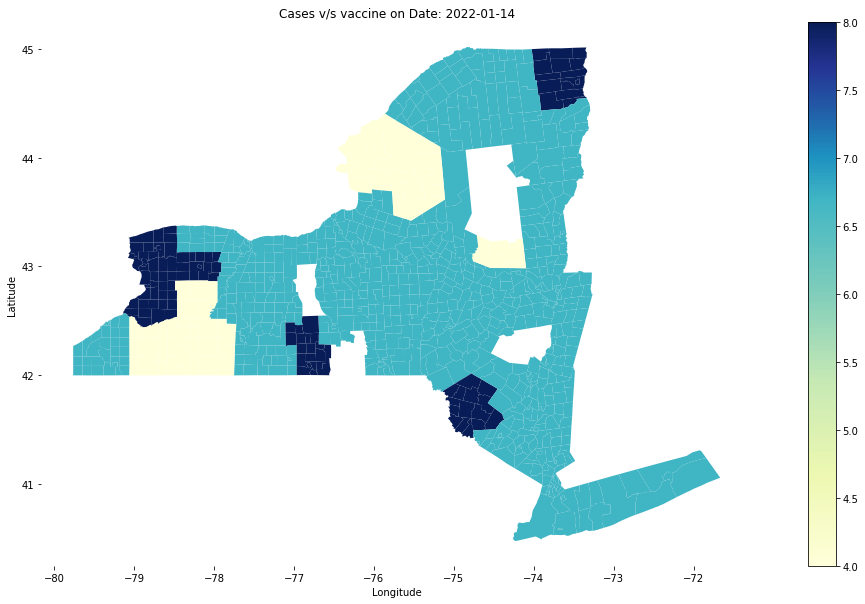

In [49]:
import warnings
warnings.filterwarnings('ignore')

# 2022-01-11, 2022-02-25, 
fig, ax = plt.subplots(figsize=(20,10), ncols=1,nrows=1)
date = '2022-01-14'
temp =  df[df.date == date]
temp = street_map.merge(temp, on=['county'])
plot_geo_data(temp, 'case_vacc', ax=ax, fig=fig, title="Cases v/s vaccine on Date: "+date, show_base_cbar=True)
# plt.show()

# Did number of cases, deaths and hospitalisation decrease in counties which had higher vaccine rates?

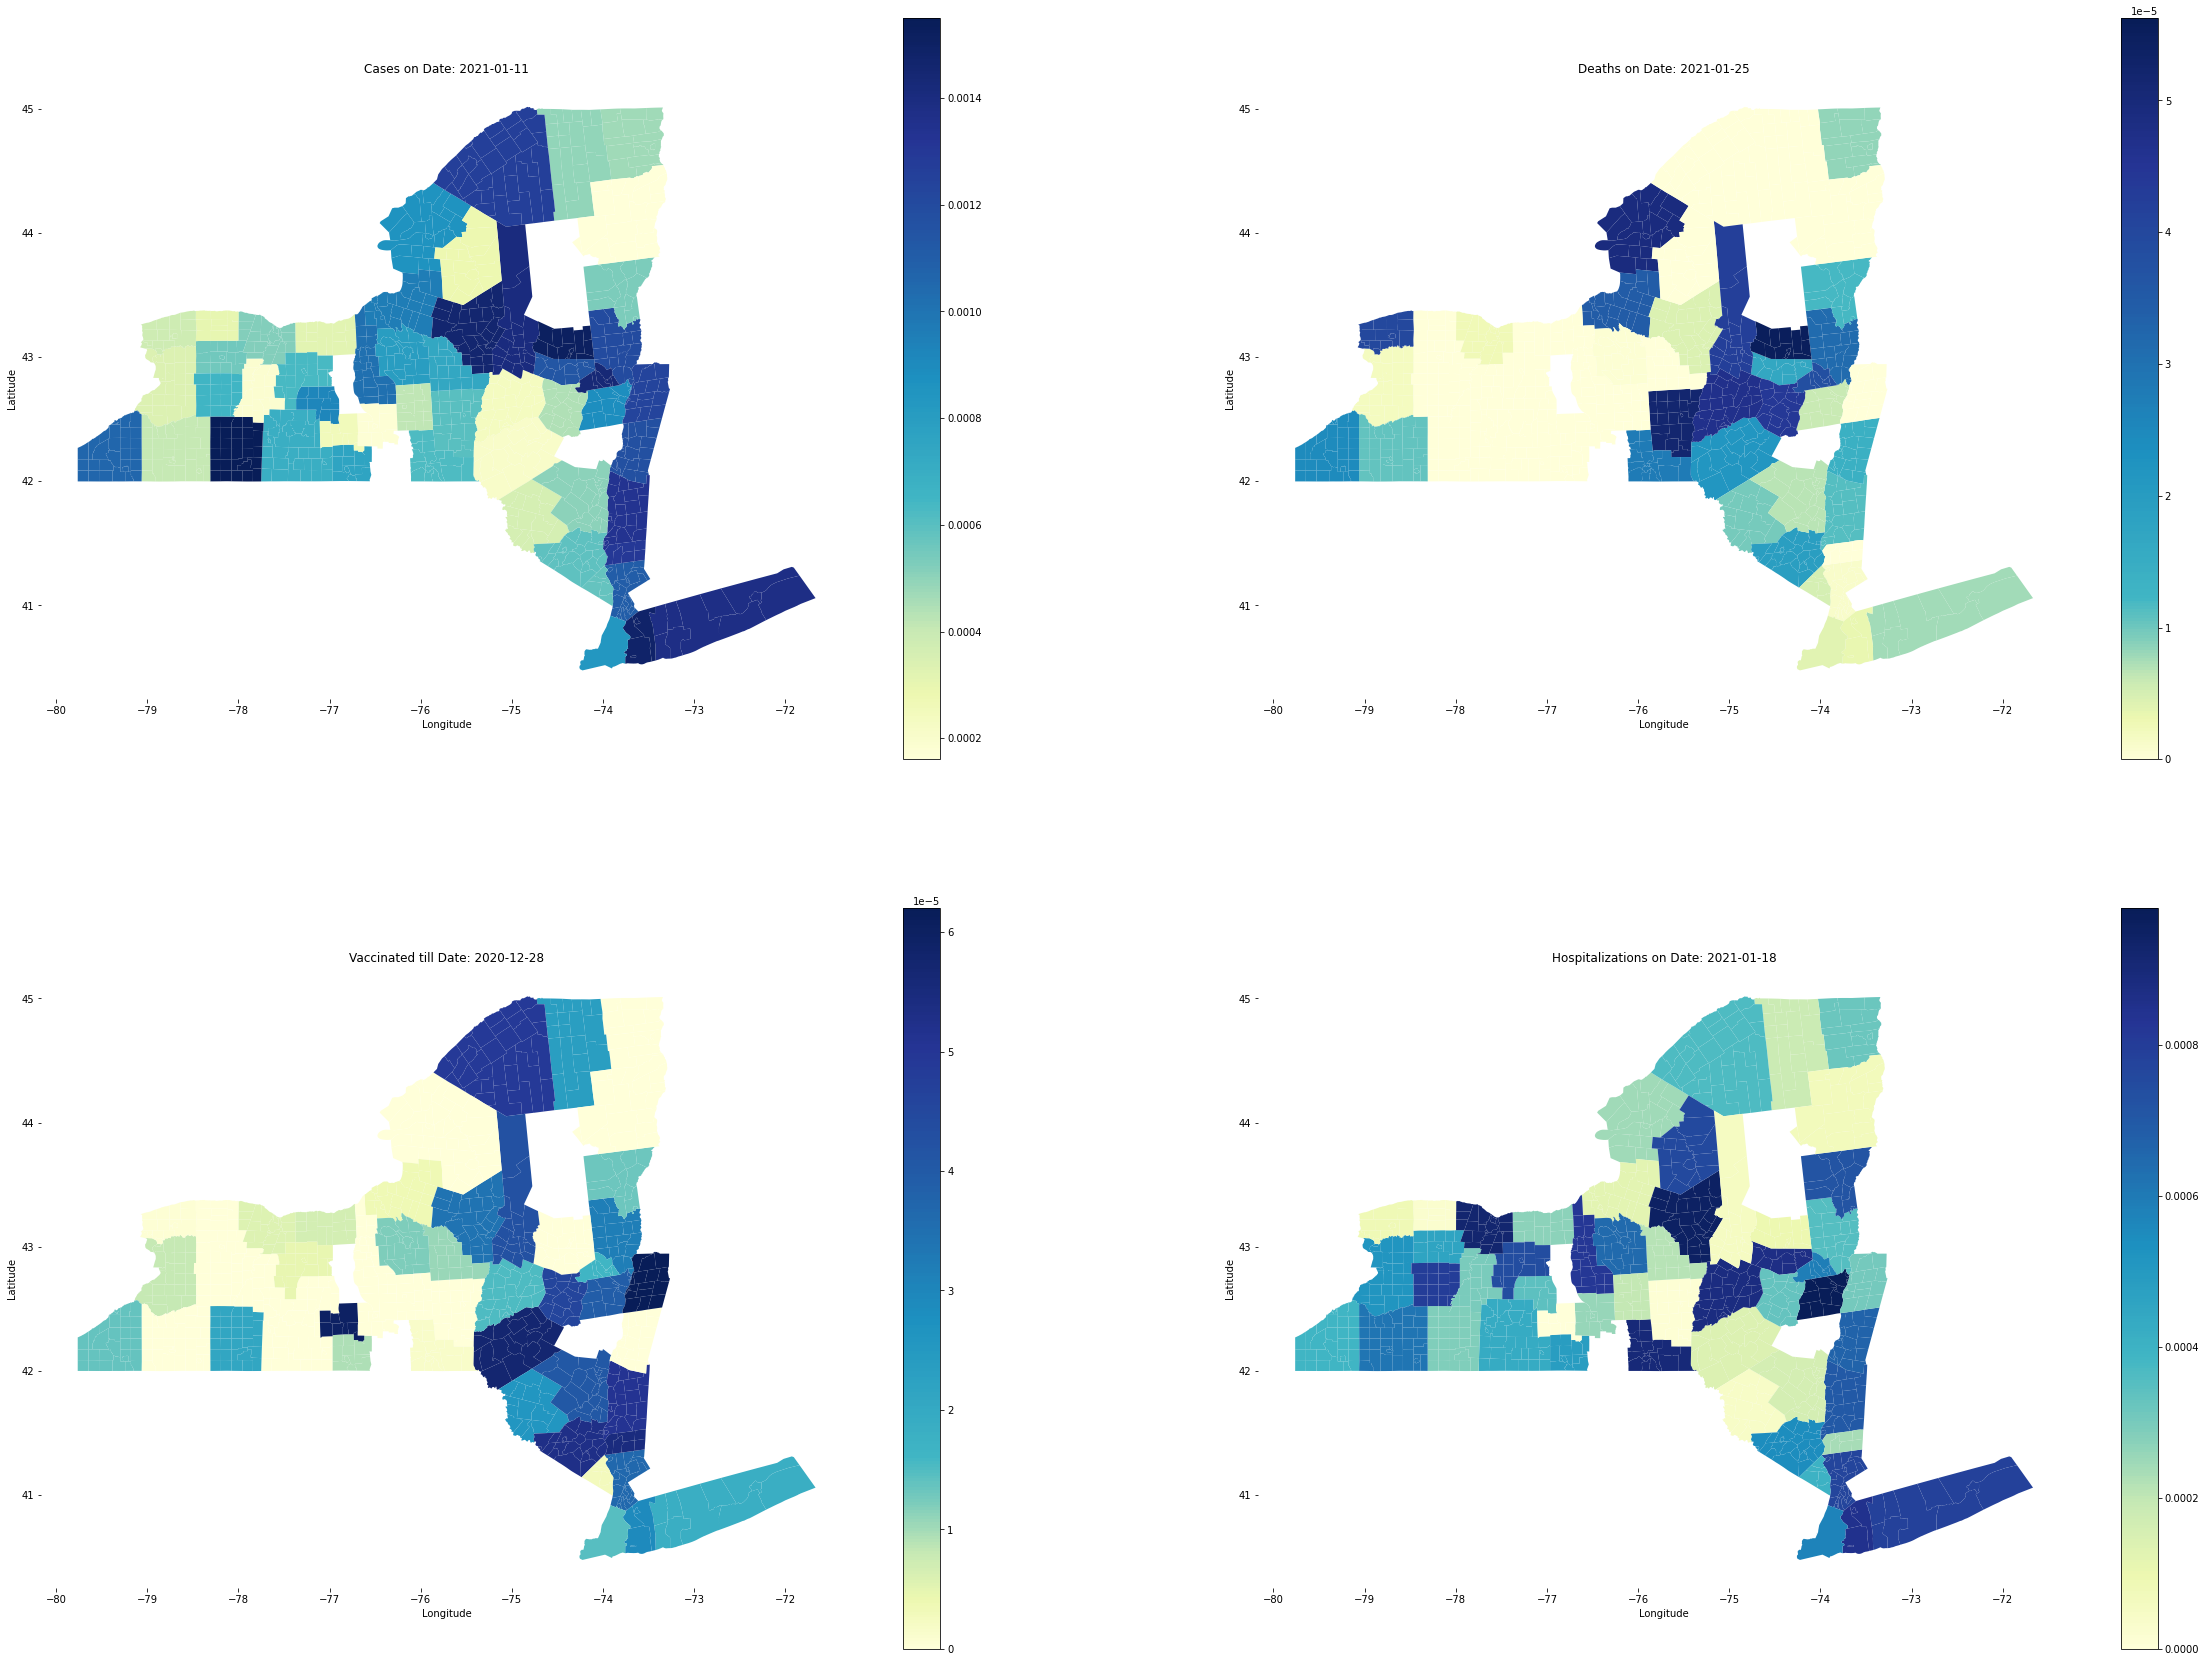

In [50]:
import warnings
warnings.filterwarnings('ignore')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2021-01-11',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-01-25',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2020-12-28',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2021-01-18',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

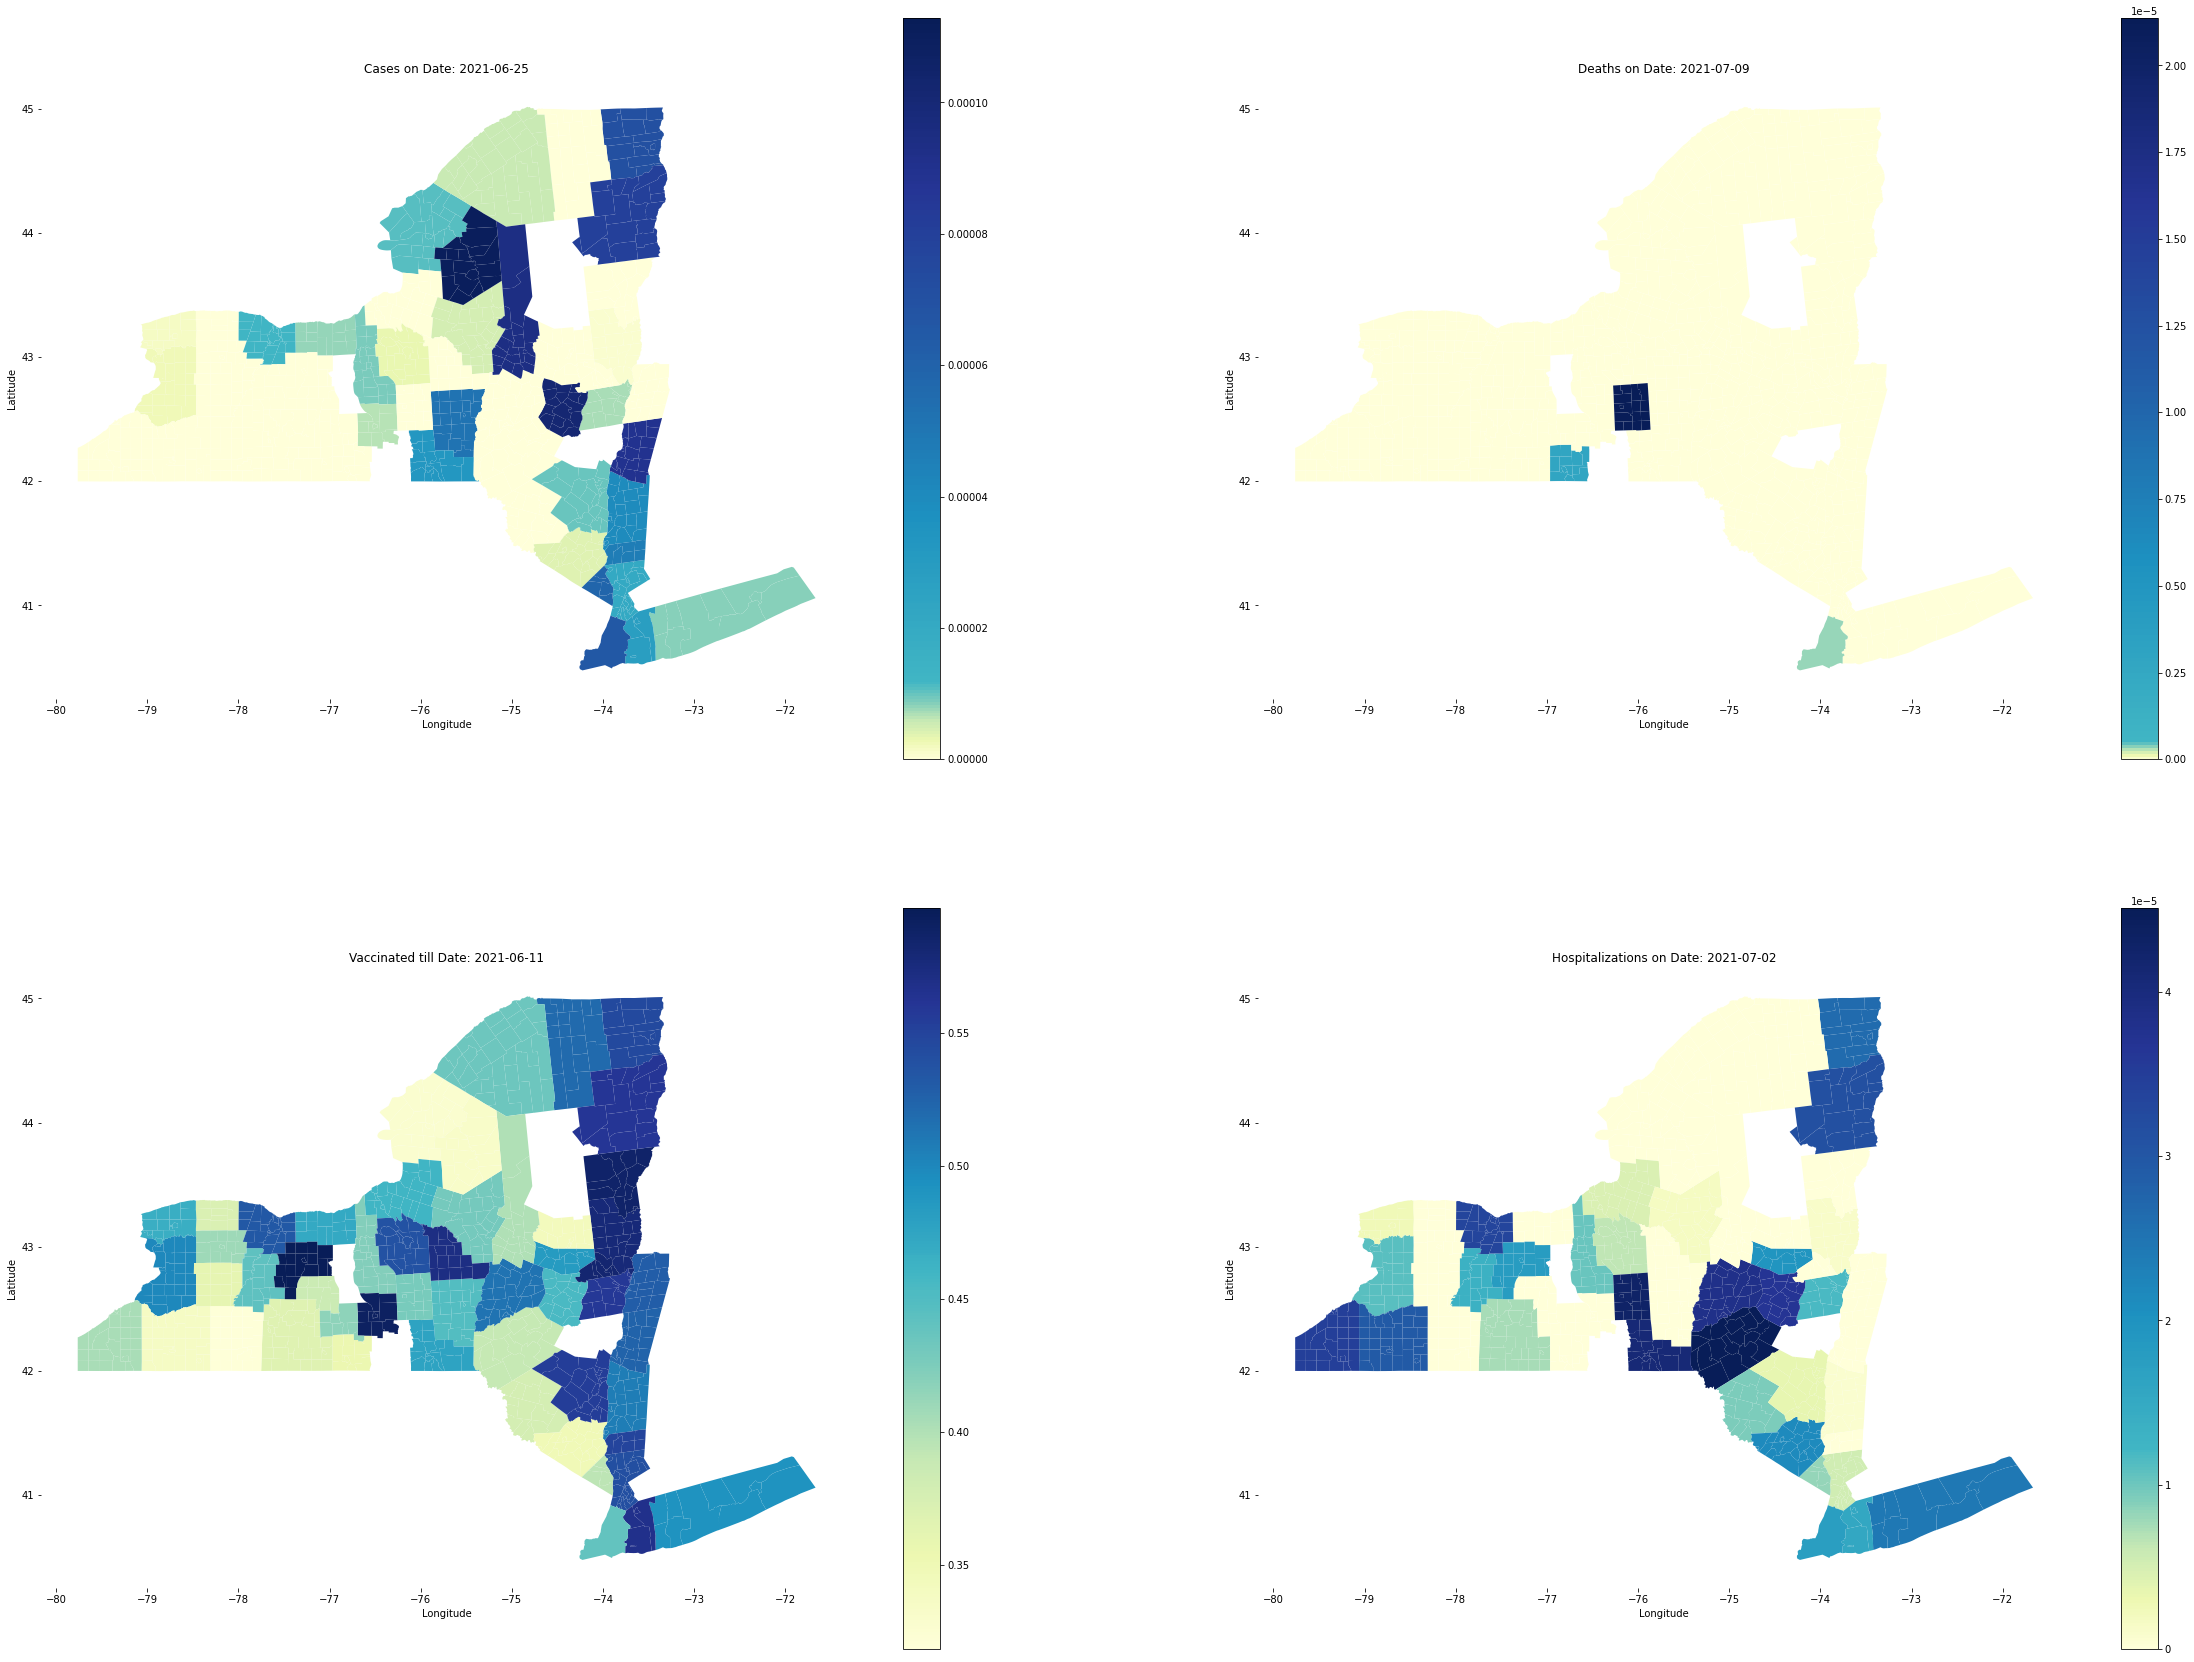

In [51]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2021-06-25',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-07-09',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-06-11',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2021-07-02',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

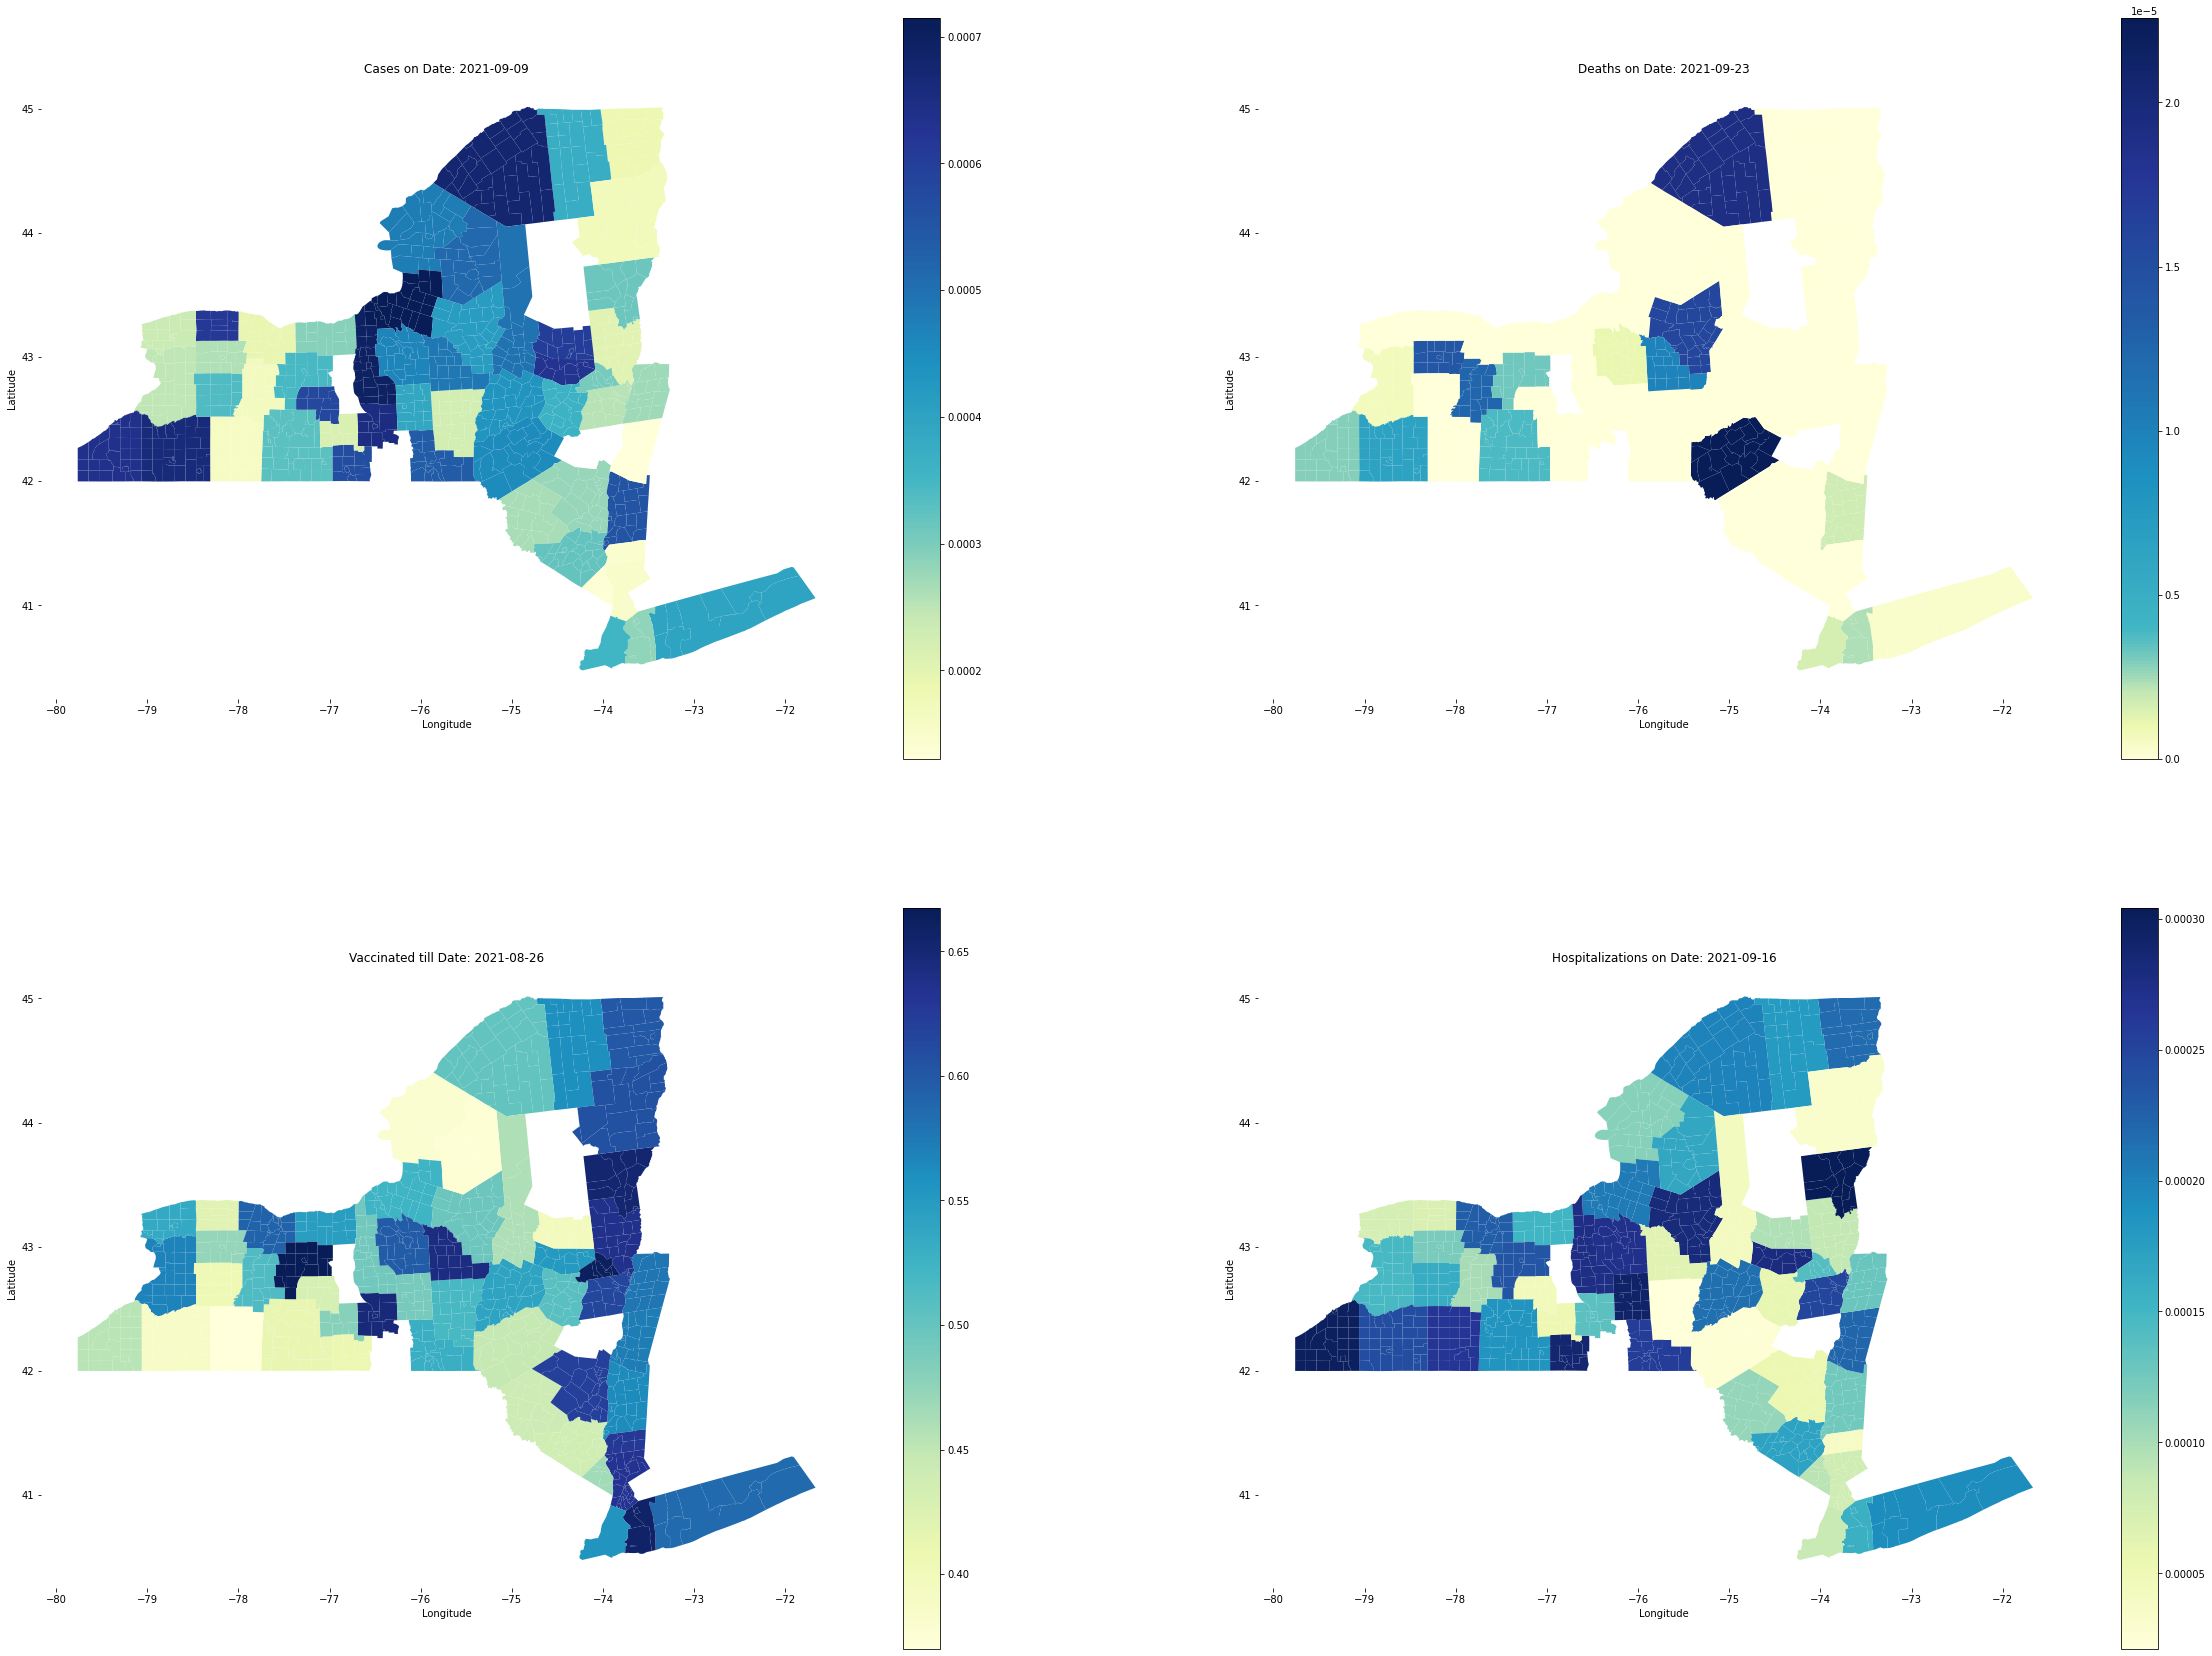

In [52]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2021-09-09',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-09-23',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-08-26',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2021-09-16',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

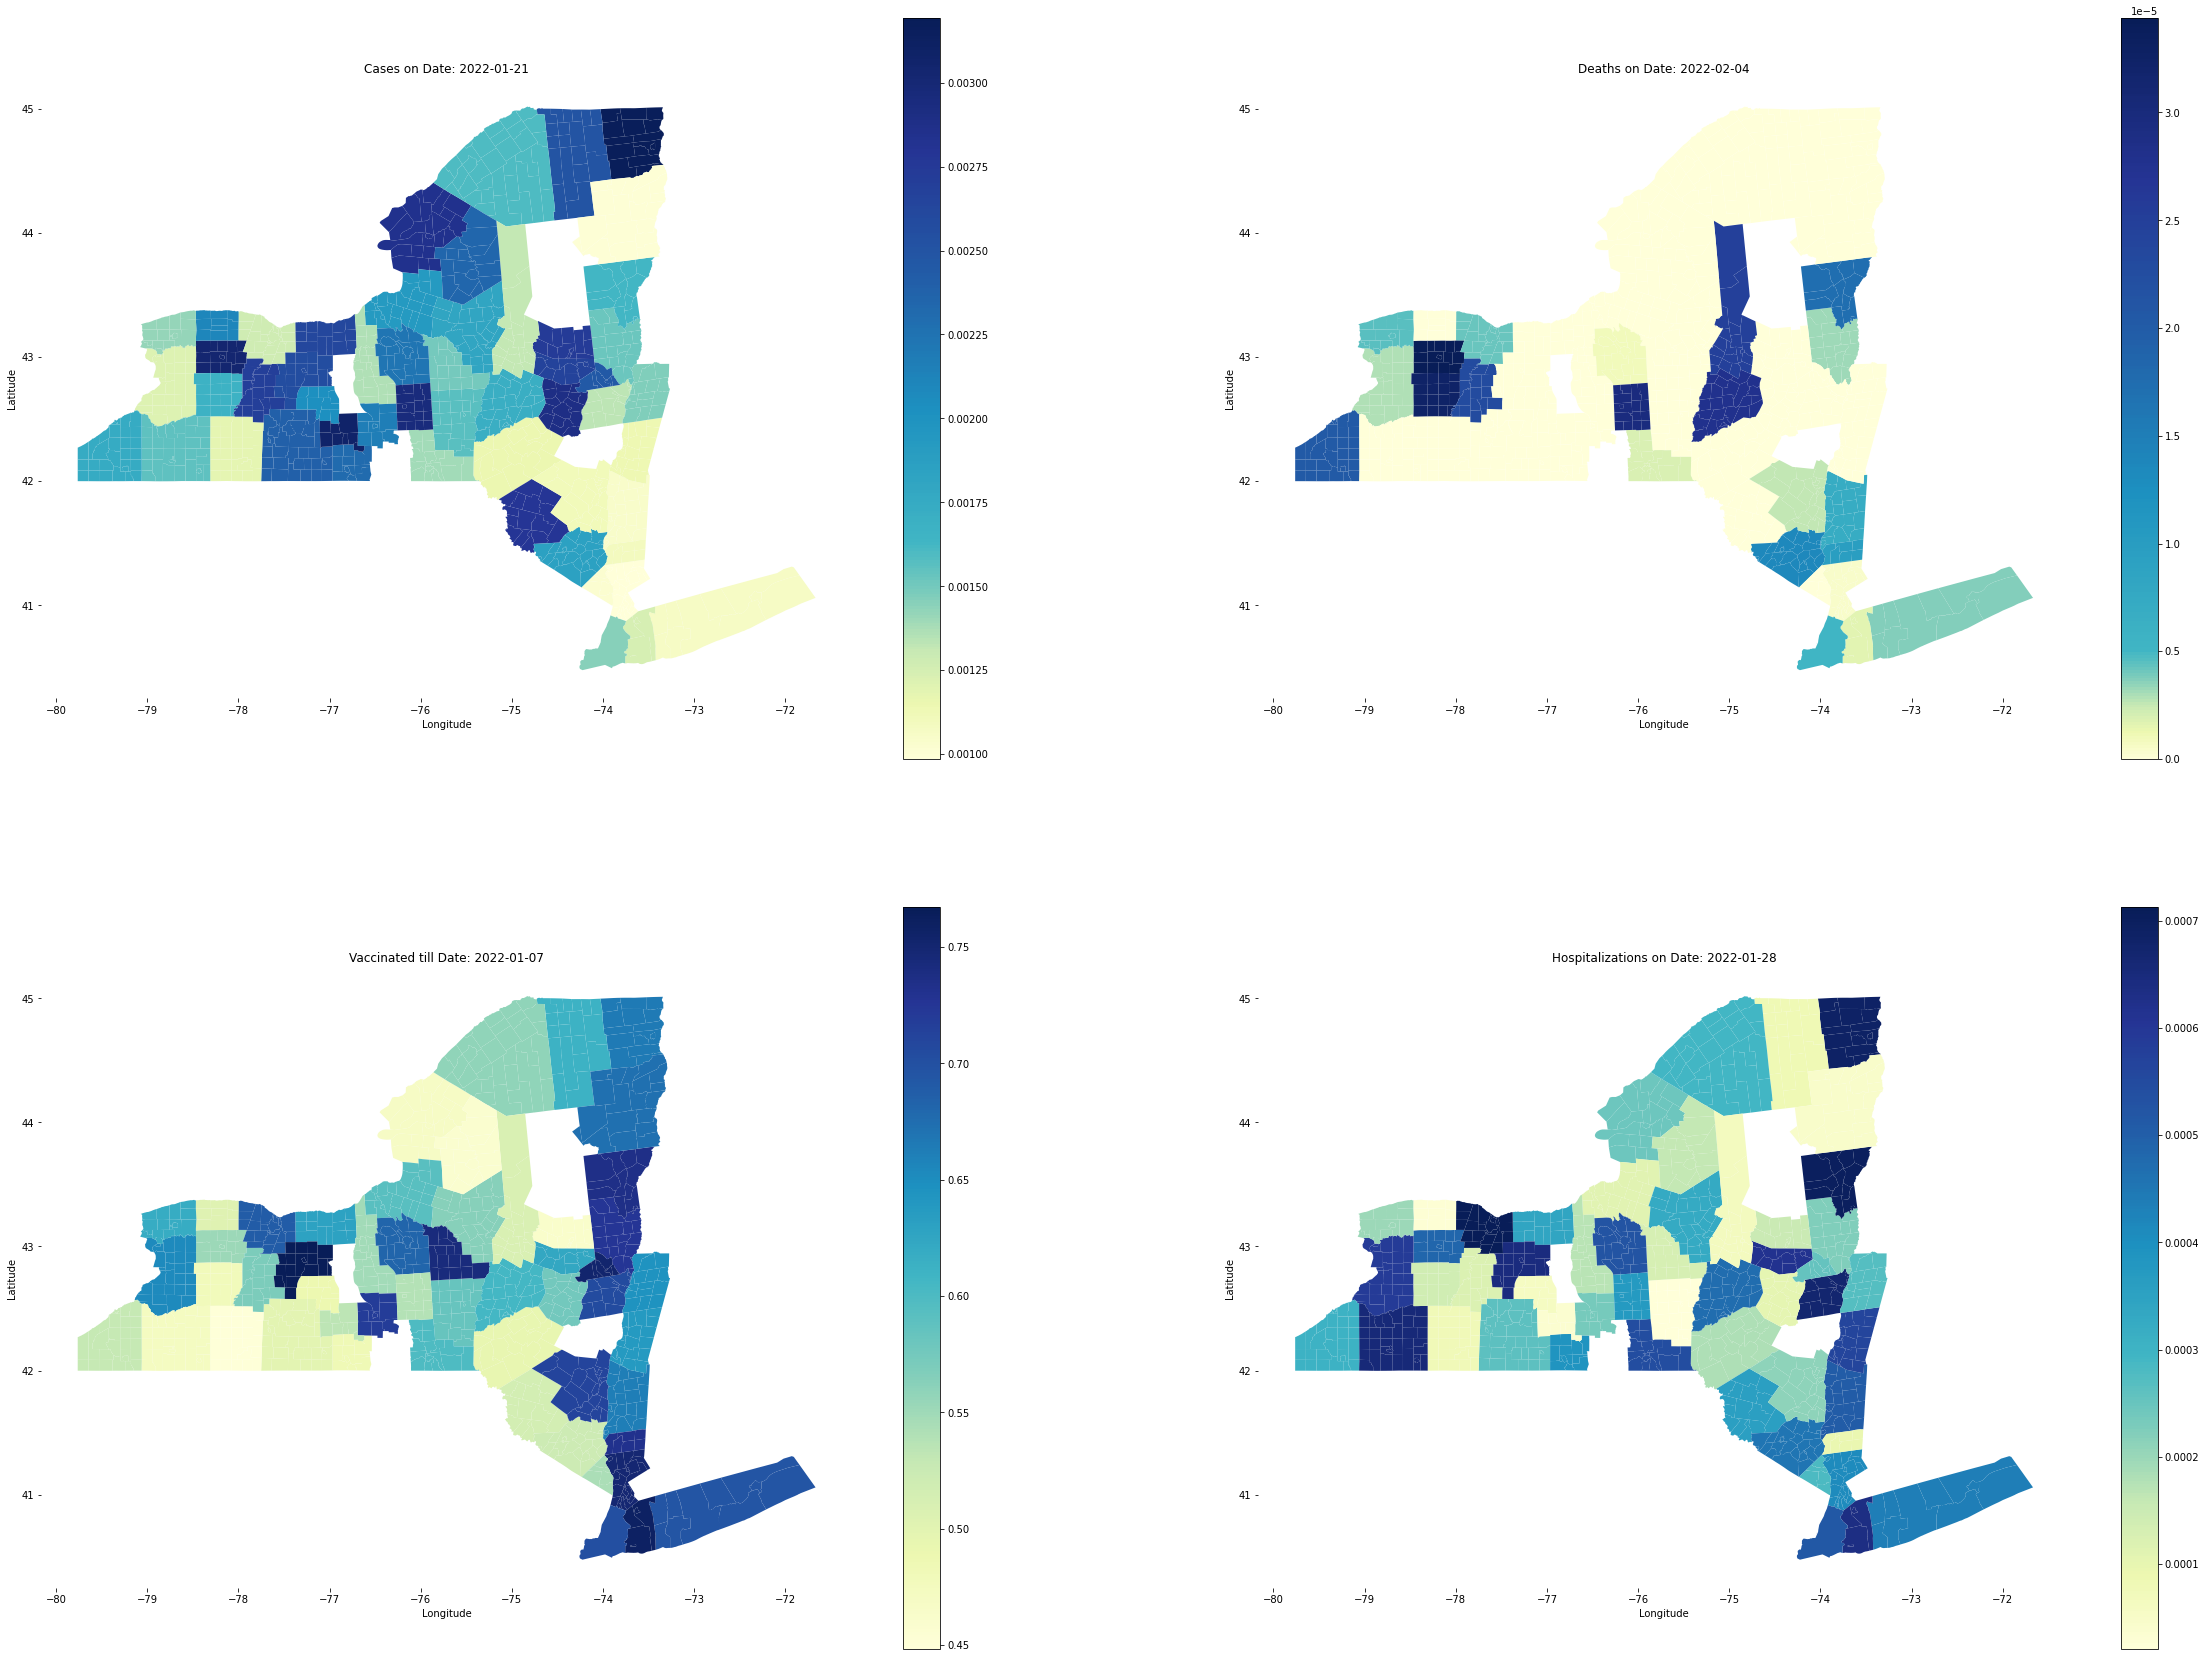

In [53]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2022-01-21',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2022-02-04',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2022-01-07',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2022-01-28',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

**Conclusion:** There isn't any obvious general trend that we see between vaccination and cases/deaths/hospitalization. Each county has its own pattern.

# Were people actually following stringency policies?

In [ ]:
stringency_data = pd.read_parquet(path+'ny_stringency.parquet')

In [ ]:
stringency_data = stringency_data.rename(columns={'Date':'date'})
stringency_data.head()

date  StringencyIndex
255978 2020-01-01              0.0
255979 2020-01-02              0.0
255980 2020-01-03              0.0
255981 2020-01-04              0.0
255982 2020-01-05              0.0

In [ ]:
data.columns

Index(['county', 'date', 'daily_cases', 'daily_cases_by_population',
       'daily_deaths', 'daily_deaths_by_population', 'POP2020',
       'Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated',
       'Partially Vaccinated per Population',
       'Fully Vaccinated per Population', 'Non Vaccinated per Population',
       'Facility Name', 'Patients Age 55 to 64 Years',
       'Patients Age 65 to 74 Years', 'Patients Age 75 to 84 Years',
       'Patients Currently Hospitalized', 'Patients Newly Admitted',
       'Patients Positive After Admission', 'Patients Currently in ICU',
       'Patients Currently ICU Intubated', 'Total Beds',
       'Number of Beds Available', 'Number of ICU Beds',
       'Number of ICU Beds Available', 'Total Beds By County',
       'Number of Beds Available By County', 'Number of ICU Beds By County',
       'Number of ICU Beds Available By County',
       'Total Beds By County per thousand ppl',
       'Number of ICU Beds By County per thousand ppl',
    

In [ ]:
mobility = data[['county', 'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]
mobility = mobility.drop_duplicates()

In [ ]:
df_stringency = pd.merge(mobility, stringency_data, on='date', how='left')
df_stringency = df_stringency.drop_duplicates()

In [ ]:
df_stringency.head()

county       date  retail_and_recreation_percent_change_from_baseline  \
0  Albany 2020-03-26                                              -51.0    
1  Albany 2020-03-27                                              -52.0    
2  Albany 2020-03-28                                              -59.0    
3  Albany 2020-03-29                                              -59.0    
4  Albany 2020-03-30                                              -51.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                              -11.0   
1                                              -15.0   
2                                              -25.0   
3                                              -30.0   
4                                              -19.0   

   parks_percent_change_from_baseline  \
0                                43.0   
1                                41.0   
2                                33.0   
3                               -15.0   
4                               -37.0   

   transit_stations_percent_change_from_baseline  \
0                                          -53.0   
1                                          -52.0   
2                                          -59.0   
3                                          -64.0   
4                                          -60.0   

   workplaces_percent_change_from_baseline  \
0                                    -55.0   
1                                    -55.0   
2                                    -37.0   
3                                    -36.0   
4                                    -56.0   

   residential_percent_change_from_baseline  StringencyIndex  
0                                      23.0            82.41  
1                                      24.0            82.41  
2                                      14.0            82.41  
3                                      13.0            82.41  
4                                      23.0            82.41

In [ ]:
df_stringency.columns

Index(['county', 'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'StringencyIndex'],
      dtype='object')

In [ ]:
# cols = df_stringency.columns[1:7]

# for col in cols:
#   new_col = col+'_smoothened'
#   df_stringency[new_col] = df_stringency[col].rolling(7).mean()

# print(df_stringency.head())

In [ ]:
# county_df = data.groupby(['county']).sum()['daily_cases_by_population']
county_df = df.groupby(['county']).sum()['daily_cases_by_population']
top5 = county_df.sort_values(ascending=False)[:5].index.to_list()
print(top5)

['Nassau', 'Suffolk', 'Orange', 'Rockland', 'New York, Bronx, Kings, Richmond, Queens']


In [ ]:
df_stringency = df_stringency.sort_values(by='date')

def plot_mobility(county, start_date, end_date):
  temp_df = df_stringency[df_stringency['county'] == county].reset_index()
  temp_df = temp_df[(temp_df['date']>=start_date) & (temp_df['date']<=end_date)].reset_index()
  temp_df = temp_df.sort_values(by='date')
  figure(figsize=(15, 6))
  plt.plot(temp_df['date'], temp_df['retail_and_recreation_percent_change_from_baseline'], label='Retail & Recreation')
  plt.plot(temp_df['date'], temp_df['grocery_and_pharmacy_percent_change_from_baseline'], label='Grocery & Pharmacy')
  plt.plot(temp_df['date'], temp_df['parks_percent_change_from_baseline'], label='Parks')
  plt.plot(temp_df['date'], temp_df['transit_stations_percent_change_from_baseline'], label='Transit Stations')
  plt.plot(temp_df['date'], temp_df['workplaces_percent_change_from_baseline'], label='Workplaces')
  plt.plot(temp_df['date'], temp_df['residential_percent_change_from_baseline'], label='Residential')
  plt.plot(temp_df['date'], temp_df['StringencyIndex'], label='Stringency Index')
  plt.xlabel('Date')
  plt.ylabel('Percentage change in Mobility')
  plt.title('Mobility Changes wrt Stringency Index for '+county)
  plt.legend()

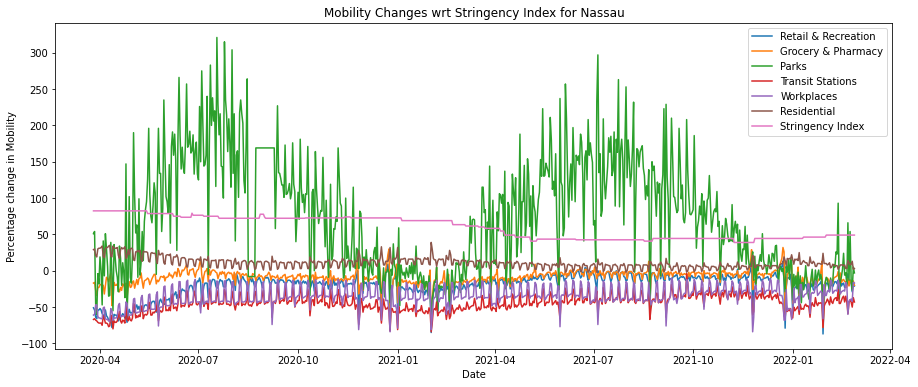

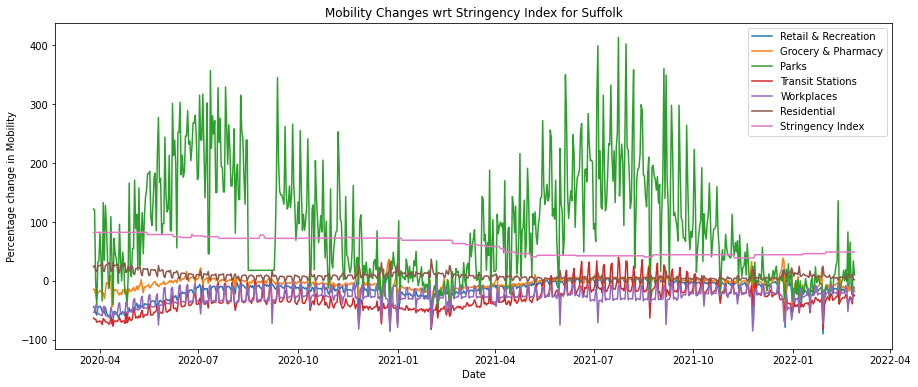

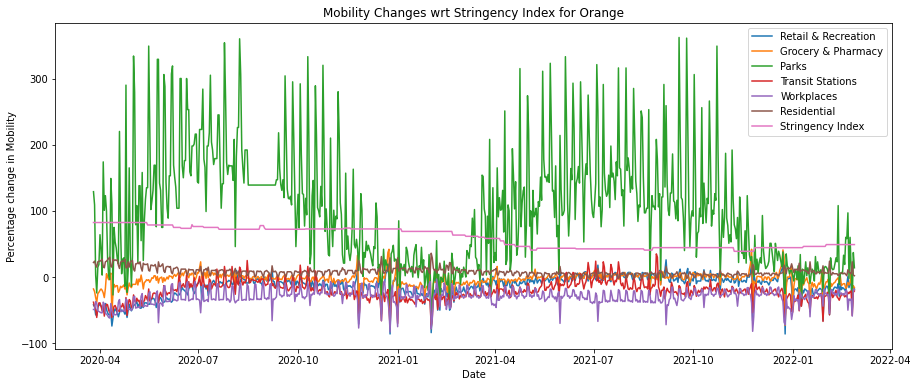

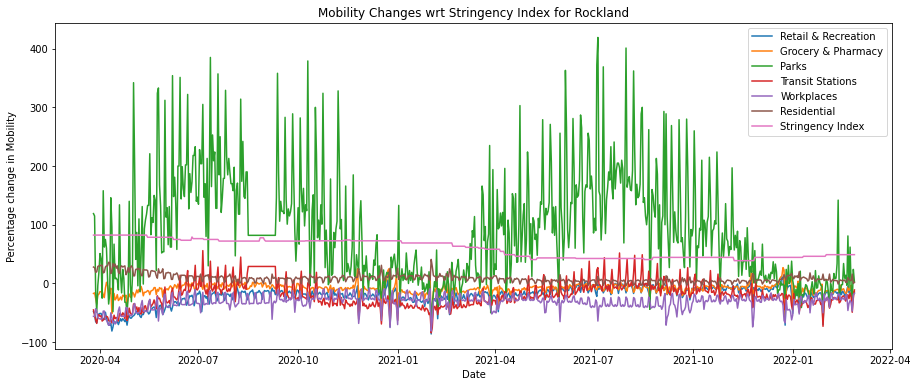

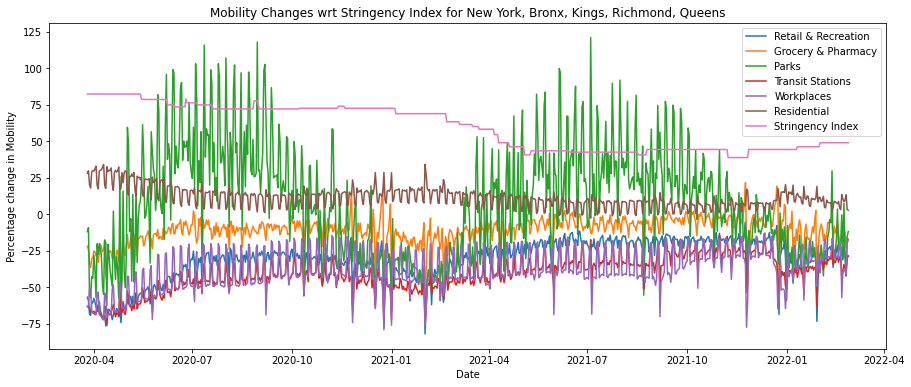

In [ ]:
start_date = df_stringency['date'].min()
end_date = df_stringency['date'].max()

for county in top5:
  plot_mobility(county, start_date, end_date)

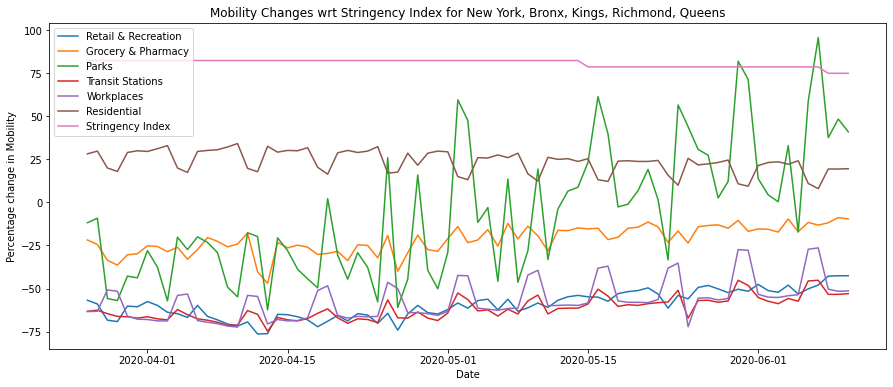

In [ ]:
# Plot mobility vs Stringency Index for First Wave

plot_mobility(county='New York, Bronx, Kings, Richmond, Queens', start_date='2020-03-16', end_date='2020-06-10')

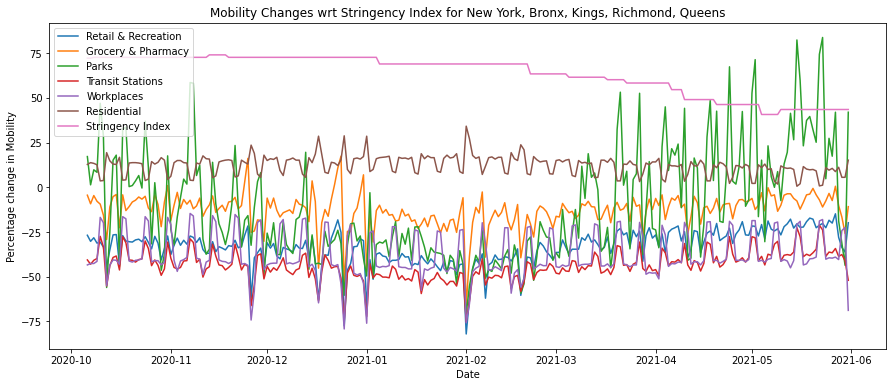

In [ ]:
# Plot mobility vs Stringency Index for Second Wave

plot_mobility(county='New York, Bronx, Kings, Richmond, Queens', start_date='2020-10-06', end_date='2021-05-31')

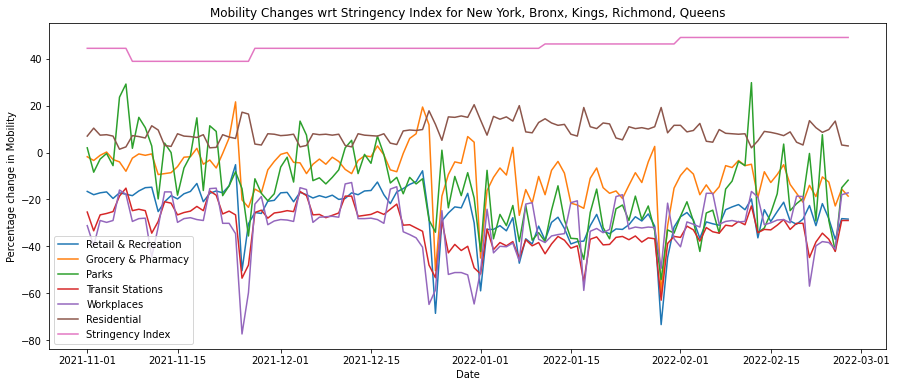

In [ ]:
# Plot mobility vs Stringency Index for Third Wave

plot_mobility(county='New York, Bronx, Kings, Richmond, Queens', start_date='2021-11-01', end_date='2022-03-06')

# Effect of Stringency on Cases

In [ ]:
cases_df = df[['date', 'county', 'daily_cases_by_population']]

cases_stringency = pd.merge(cases_df, stringency_data, on='date', how='left')

In [ ]:
cases_stringency.head()

date  county  daily_cases_by_population  StringencyIndex
0 2020-03-26  Albany                   0.000543            82.41
1 2020-03-27  Albany                   0.000051            82.41
2 2020-03-28  Albany                   0.000025            82.41
3 2020-03-29  Albany                   0.000032            82.41
4 2020-03-30  Albany                   0.000038            82.41

Text(0.5, 1.0, 'Cases wrt Stringency Index for Albany')

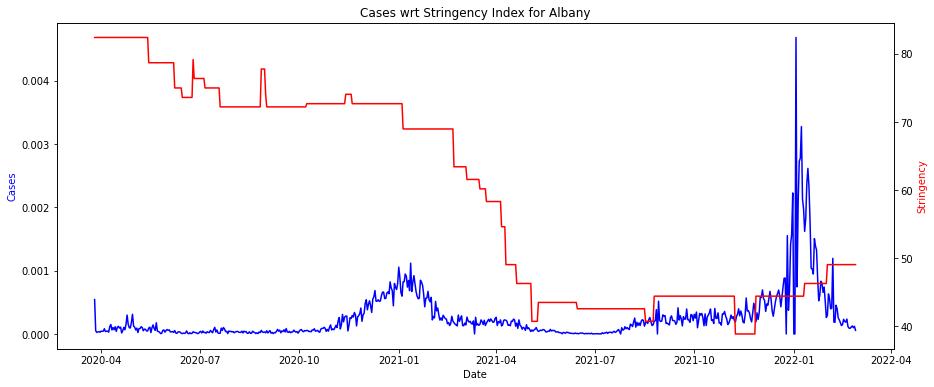

In [ ]:
county = 'Albany'
temp_df = cases_stringency[cases_stringency['county']==county]
temp_df = temp_df.sort_values(by='date')

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(temp_df['date'], temp_df['daily_cases_by_population'], label='Cases', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Cases', color='blue')
ax2=ax.twinx()
ax2.plot(temp_df['date'], temp_df['StringencyIndex'], label='StringencyIndex', color='red')
ax2.set_ylabel('Stringency', color='red')
plt.title('Cases wrt Stringency Index for '+county)